In [ ]:
import yfinance

In [ ]:
import yfinance as yf

# Define the ticker symbol
ticker = "AAPL"

# Define the start and end dates
start_date = "2015-01-01"
end_date = "2023-12-31"

# Get the stock data
data_aapl = yf.download(ticker, start=start_date, end=end_date)

# Print the stock data
print(data_aapl)

In [ ]:
data_aapl = data_aapl.drop(columns=data_aapl.columns.difference(['Adj Close']))
print(data_aapl)

In [ ]:
import pandas as pd

# Read the S&P 500 constituents from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
df = pd.read_html(url)[0]

# Extract the ticker symbols
sp500_tickers = df["Symbol"].tolist()

# Convert the list to a Python string
sp500_tickers_string = ", ".join(sp500_tickers)

# Print the result
print(sp500_tickers_string)

In [ ]:
import yfinance as yf

# Define the ticker symbol
ticker = "MSFT"

# Define the start and end dates
start_date = "2015-01-01"
end_date = "2023-12-31"

# Get the stock data
data_msft = yf.download(ticker, start=start_date, end=end_date)

# Print the stock data
print(data_msft)

In [ ]:
data_msft = data_msft.drop(columns=data_msft.columns.difference(['Adj Close']))
print(data_msft)

In [ ]:
import pandas as pd

# Combine the data for AAPL and MSFT
data_combined = pd.concat([data_aapl['Adj Close'], data_msft['Adj Close']], axis=1)

print(data_combined)


In [ ]:
import yfinance as yf

# Define the ticker symbol
ticker = "MSFT"

# Define the start and end dates
start_date = "2015-01-01"
end_date = "2023-12-31"

# Get the stock data
data_tsla = yf.download(ticker, start=start_date, end=end_date)

# Print the stock data
# print(data_msft)

data_tsla = data_tsla.drop(columns=data_tsla.columns.difference(['Adj Close']))
print(data_tsla)

In [ ]:
data_combined['TSLA'] = data_tsla['Adj Close']



In [ ]:
print(data_combined)

In [ ]:
for ticker in sp500_tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data.drop(columns=data.columns.difference(['Adj Close']))
    data_combined[ticker] = data['Adj Close']

print(data_combined)

In [ ]:
data_combined.to_csv('sp500.csv')

In [ ]:
import yfinance as yf

# Define the ticker symbol
ticker = "AAPL"

# Define the start and end dates
start_date = "1980-12-12"
end_date = "2023-12-31"

# Get the stock data
data_aapl = yf.download(ticker, start=start_date, end=end_date)

# Print the stock data
print(data_aapl)



In [ ]:
import yfinance as yf
import pandas as pd

# List of S&P 500 tickers
sp500_tickers = [ticker for ticker in sp500_tickers if ticker not in ['BRK.B', 'BF.B']]

data = []

for ticker in sp500_tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(period="max")
    start_date = hist.index[0]
    data.append([ticker, start_date])

df = pd.DataFrame(data, columns=['Ticker', 'Start_Date'])
print(df)


In [ ]:
earliest_date = df['Start_Date'].min()
print(earliest_date)

In [ ]:
combined_data = {}
adj_close_df = pd.DataFrame()
end_date = "2023-12-31"
for index, row in df.head(10).iterrows():
    ticker = row['Ticker']
    start_date = row['Start_Date']
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data.drop(columns=data.columns.difference(['Adj Close']))
    adj_close_df = adj_close_df.append(data)

matrix = adj_close_df.pivot_table(values='Adj Close', index=adj_close_df.index, columns='Ticker')
print(matrix)


In [ ]:
# combined_data = {}
# adj_close_df = pd.DataFrame()
start_date = "1962-01-02"
end_date = "2023-12-31"

date_list = pd.date_range(start=start_date, end=end_date, freq='B')

print(date_list)

In [ ]:
import pandas as pd

# Create an empty DataFrame
matrix = pd.DataFrame(index=sp500_tickers, columns=date_list)

# Print the matrix
print(matrix)


In [ ]:
for ticker in sp500_tickers:
    start_date = pd.Timestamp(df[df['Ticker'] == ticker]['Start_Date'].values[0])
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data.drop(columns=data.columns.difference(['Adj Close']))
    matrix.loc[ticker] = data['Adj Close']


In [ ]:
print(matrix)

In [ ]:
matrix = matrix.transpose()
matrix.to_csv('sp500_matrix.csv')

In [ ]:
matrix = pd.read_csv('sp500_matrix.csv', index_col=0, parse_dates=True)

In [ ]:
print(matrix)

In [ ]:
import yfinance as yf

# Define the ticker symbol
ticker = "NESN.SW"

# Define the start and end dates
start_date = "2015-01-01"
end_date = "2023-12-31"

# Get the stock data
data_nesn = yf.download(ticker, start=start_date, end=end_date)

# Print the stock data
print(data_nesn)


In [ ]:
smi_tickers = ['NESN.SW', 'ROG.SW', 'NOVN.SW', 'CFR.SW', 'ZURN.SW', 'UBSG.SW', 'ABBN.SW', 'LONN.SW', 'SIKA.SW', 'ALC.SW', 'GIVN.SW', 'HOLN.SW', 'SCMN.SW', 'PGHN.SW', 'SREN.SW', 'SOON.SW', 'GEBN.SW', 'SLHN.SW', 'LOGN.SW', 'KNIN.SW'] 

smi_data_combined = pd.DataFrame()

for ticker in smi_tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data.drop(columns=data.columns.difference(['Adj Close']))
    smi_data_combined[ticker] = data['Adj Close']

print(smi_data_combined)

In [ ]:
data = []

for ticker in smi_tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(period="max")
    start_date = hist.index[0]
    data.append([ticker, start_date])

df = pd.DataFrame(data, columns=['Ticker', 'Start_Date'])
print(df)


In [ ]:
earliest_date = df['Start_Date'].min()
print(earliest_date)

In [ ]:
# combined_data = {}
# adj_close_df = pd.DataFrame()
start_date = "1990-01-03"
end_date = "2023-12-31"

date_list = pd.date_range(start=start_date, end=end_date, freq='B')
print(date_list)

In [ ]:
import pandas as pd

# Create an empty DataFrame
smi_matrix = pd.DataFrame(index=smi_tickers, columns=date_list)

for ticker in smi_tickers:
    start_date = pd.Timestamp(df[df['Ticker'] == ticker]['Start_Date'].values[0])
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data.drop(columns=data.columns.difference(['Adj Close']))
    smi_matrix.loc[ticker] = data['Adj Close']

print(smi_matrix)

In [ ]:
import pandas as pd

# Define the date threshold
threshold_date = pd.Timestamp('2000-01-01')

# Remove columns where the value is less than the threshold date
smi_matrix = smi_matrix.drop(columns=smi_matrix.columns[smi_matrix.columns < threshold_date])

# Print the updated DataFrame
print(smi_matrix)


In [ ]:
# Convert column names to Timestamp objects
matrix.columns = pd.to_datetime(matrix.columns)

# Remove columns where the value is less than the threshold date
matrix = matrix.drop(columns=matrix.columns[matrix.columns < threshold_date])

# Print the updated DataFrame
print(matrix)


In [ ]:
smi_matrix.to_csv('smi_matrix.csv')

In [ ]:
smi_matrix = pd.read_csv('smi_matrix.csv', index_col=0, parse_dates=True)
smi_matrix = smi_matrix.transpose()
smi_matrix.to_csv('smi_matrix.csv')

In [ ]:
us_data = pd.read_excel('API_USA_DS2_en_excel_v2_820.xls', index_col=0, sheet_name='Data')

In [ ]:
print(us_data)

In [ ]:
import pandas as pd
import pandas as pd

rate_swiss = [4.00, 2.25, 1.25, 0.75, 1.25, 1.50, 2.50, 3.25, 1.00, 0.75, 0.75, 0.25, 0.25, 0.25, 0.25, -0.25, -0.25, -0.25, -0.25, -0.75, -0.75, -0.75, 1.00, 1.75]

# Create a DataFrame for rate_swiss
df_rate_swiss = pd.DataFrame(rate_swiss, columns=['rate'])


In [ ]:
import pandas as pd

rate_us = [6.50, 1.75, 1.25, 1.00, 2.25, 4.25, 5.25, 4.25, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.38, 0.63, 1.38, 2.38, 1.63, 0.13, 0.13, 4.38]
# Generate a range of dates from "2000-01-01" to "2022-12-31"
dates = pd.date_range(start="2000-01-01", end="2022-12-31", freq='Q')

# Create a DataFrame with rate_us as values and dates as index
df_us = pd.DataFrame(rate_us, index=dates, columns=['Rate'])

print(df_us)


In [ ]:
values_swiss = [3.50, 4.00, 4.00, 4.00, 3.75, 3.75, 2.75, 2.25, 2.25, 1.75, 1.25, 1.25, 0.75, 0.75, 0.75, 0.75, 0.75, 1.00, 1.25, 1.25, 1.25, 1.25, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.25, 3.25, 3.25, 3.25, 1.00, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.25, 0.50, 1.00]


In [ ]:
values_us = [6.00, 6.50, 6.50, 6.50, 5.31, 3.97, 3.27, 1.75, 1.75, 1.75, 1.75, 1.25, 1.25, 1.00, 1.00, 1.00, 1.00, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25, 5.25, 5.25, 5.25, 5.25, 4.75, 4.25, 2.25, 2.00, 2.00, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.38, 0.38, 0.38, 0.38, 0.63, 0.88, 1.13, 1.13, 1.38, 1.63, 1.88, 2.13, 2.38, 2.38, 2.38, 1.88, 1.63, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.38, 1.63, 3.13, 4.38]


In [ ]:
dates = pd.date_range(start="2000-01-01", end="2022-12-31", freq='Q')

# Create a DataFrame with rate_us as values and dates as index
df_swiss = pd.DataFrame(values_swiss, index=dates, columns=['Rate'])
df_us = pd.DataFrame(values_us, index=dates, columns=['Rate'])

In [ ]:
print(df_us)

In [ ]:
# df is your original DataFrame
start_date = df_us.index.min().to_period('Q').start_time
end_date = df_us.index.max()
new_index = pd.date_range(start_date, end_date, freq='D')
df_daily_us = df_us.reindex(new_index).bfill().ffill()

In [ ]:
# df is your original DataFrame
start_date = df_swiss.index.min().to_period('Q').start_time
end_date = df_swiss.index.max()
new_index = pd.date_range(start_date, end_date, freq='D')
df_daily_swiss = df_swiss.reindex(new_index).bfill().ffill()

In [ ]:
print(df_daily_us.to_string())

In [ ]:
import pandas as pd

rate_swiss = [4.00, 2.25, 1.25, 0.75, 1.25, 1.50, 2.50, 3.25, 1.00, 0.75, 0.75, 0.25, 0.25, 0.25, 0.25, -0.25, -0.25, -0.25, -0.25, -0.75, -0.75, -0.75, 1.00]
df_swiss = pd.DataFrame(rate_swiss)

# Create a DataFrame with rate_us as values and dates as index
df_swiss = pd.DataFrame(rate_swiss, index=dates, columns=['Rate'])

print(df_swiss)


In [ ]:
import yfinance as yf

# Define the ticker symbol
ticker = "MSFT"

# Define the start and end dates
start_date = "2022-01-01"
end_date = "2022-12-31"

# Get the stock data
data_msft = yf.download(ticker, start=start_date, end=end_date)

# Calculate the daily returns
data_msft['Daily Returns'] = data_msft['Adj Close'].pct_change()

# Calculate the volatility
volatility = data_msft['Daily Returns'].std()

# Print the volatility
print("Volatility of Microsoft stock for the past year:", volatility)


In [ ]:
swiss_1 = pd.read_csv('Switzerland 1-Year Bond Yield Historical Data.csv', index_col=0, parse_dates=True)

In [ ]:
swiss_2 = pd.read_csv('Switzerland 1-Year Bond Yield Historical Data_2.csv', index_col=0, parse_dates=True)

In [ ]:
swiss_bonds = pd.concat([swiss_2, swiss_1])

In [ ]:
swiss_bonds.to_csv('swiss_bonds.csv')

In [ ]:
swiss_bonds = pd.read_csv('swiss_bonds.csv', index_col=0, parse_dates=True)

In [ ]:
print(swiss_bonds)

In [ ]:
us_bonds = pd.read_csv("DGS1.csv", index_col=0, parse_dates=True)

In [ ]:
us_bonds.fillna(method='bfill', inplace=True)


In [ ]:
import yfinance as yf

# Define the ticker symbol for S&P 500
ticker = "^GSPC"

# Define the start and end dates
start_date = "2000-01-01"
end_date = "2022-12-31"

# Get the S&P 500 data
data_sp500 = yf.download(ticker, start=start_date, end=end_date)

# Print the S&P 500 data
print(data_sp500)
data_sp500 = data_sp500.drop(columns=data_sp500.columns.difference(['Adj Close']))


In [ ]:
import yfinance as yf

# Define the ticker symbol for SMI
ticker = "^SSMI"

# Define the start and end dates
start_date = "2000-01-01"
end_date = "2022-12-31"

# Get the SMI data
data_smi = yf.download(ticker, start=start_date, end=end_date)

# Print the SMI data
print(data_smi)
data_smi = data_smi.drop(columns=data_smi.columns.difference(['Adj Close']))

In [ ]:
df_combined_swiss = df_daily_swiss.join(data_smi, how='inner').join(swiss_bonds, how='inner')


In [ ]:
print(df_combined_swiss.to_string())

In [ ]:
df_combined_us = df_daily_us.join(data_sp500, how='inner').join(us_bonds, how='inner')
print(df_combined_us.to_string()) 

In [ ]:
df_combined_us.to_csv('us_combined.csv')
df_combined_swiss.to_csv('swiss_combined.csv')

In [ ]:
df_combined_us = pd.read_csv('us_combined.csv', index_col=0, parse_dates=True)

In [ ]:
df_combined_us = df_combined_us.join(matrix, how='inner')

In [ ]:
print(df_combined_us.to_string())

In [ ]:
df_combined_swiss = pd.read_csv('swiss_combined.csv', index_col=0, parse_dates=True)
df_combined_swiss = df_combined_swiss.join(smi_matrix, how='inner')

In [ ]:
print(df_combined_swiss.to_string())

In [ ]:
df_combined_us.to_csv('us_combined.csv')
df_combined_swiss.to_csv('swiss_combined.csv')

In [ ]:
us_data = pd.read_excel('API_USA_DS2_en_excel_v2_820.xls', index_col=0, sheet_name='Data')
swiss_data = pd.read_excel('API_CHE_DS2_en_excel_v2_16891.xls', index_col=0, sheet_name='Data')

In [ ]:
# df_combined_us and df_combined_swiss are your original DataFrames
us_columns = df_combined_us[['interest_rate', 'mkt_index', 'bond_yield']]
swiss_columns = df_combined_swiss[['interest_rate', 'mkt_index', 'bond_yield']]

# Concatenate the selected columns
df_combined = pd.concat([us_columns, swiss_columns], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

In [ ]:
df_combined_swiss = pd.read_csv('swiss_combined.csv', index_col=0, parse_dates=True)
df_combined_us = pd.read_csv('us_combined.csv', index_col=0, parse_dates=True) 

In [ ]:
# df is your original DataFrame
df_combined_swiss = df_combined_swiss.reset_index().drop_duplicates(subset='index')
df_combined_swiss = df_combined_swiss.rename(columns={'index': 'Date'})
df_combined_swiss = df_combined_swiss.set_index('Date')
df_combined_us = df_combined_us.reset_index().drop_duplicates(subset='index')
df_combined_us = df_combined_us.rename(columns={'index': 'Date'})
df_combined_us = df_combined_us.set_index('Date')

In [ ]:
print(df_combined_swiss.to_string())

In [ ]:
df_all_combined = df_combined_us.join(df_combined_swiss, how='inner')

In [ ]:
print(df_all_combined.to_string())

In [ ]:
df_core = df_all_combined[['us_interest_rate', 'us_mkt_index', 'us_bond_yield', 'swiss_interest_rate', 'swiss_mkt_index', 'swiss_bond_yield']]
# Convert string values to numeric values, replacing non-numeric values with NaN
df_core = df_core.apply(pd.to_numeric, errors='coerce')
# Calculate the correlation matrix
correlation_matrix = df_core.corr()


In [ ]:
print(correlation_matrix)

In [ ]:
import seaborn as sns

# Set the style of the correlation matrix
sns.set(style="white")

# Create a heatmap of the correlation matrix
correlation_heatmap = correlation_matrix.style.background_gradient(cmap='coolwarm')

# Display the correlation heatmap
correlation_heatmap


In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, figsize=(12, 18))

# Scatter plot for interest rates
axs[0].scatter(df_core['us_interest_rate'], df_core['swiss_interest_rate'])
axs[0].set_xlabel('US Interest Rate')
axs[0].set_ylabel('Swiss Interest Rate')

# Scatter plot for market indexes
axs[1].scatter(df_core['us_mkt_index'], df_core['swiss_mkt_index'])
axs[1].set_xlabel('US Market Index')
axs[1].set_ylabel('Swiss Market Index')

# Scatter plot for bond yields
axs[2].scatter(df_core['us_bond_yield'], df_core['swiss_bond_yield'])
axs[2].set_xlabel('US Bond Yield')
axs[2].set_ylabel('Swiss Bond Yield')

plt.suptitle('Scatter Plots of US and Swiss Variables')
plt.show()

In [ ]:
import matplotlib.dates as mdates

# Convert the index to datetime with dayfirst=True
df_core.index = pd.to_datetime(df_core.index, dayfirst=True)

fig, axs = plt.subplots(3, figsize=(12, 18))

# Time series plot for interest rates
axs[0].plot(df_core.index, df_core['us_interest_rate'], label='US Interest Rate')
axs[0].plot(df_core.index, df_core['swiss_interest_rate'], label='Swiss Interest Rate')
axs[0].set_ylabel('Interest Rate')
axs[0].legend()

# Time series plot for market indexes
axs[1].plot(df_core.index, df_core['us_mkt_index'], label='US Market Index')
axs[1].plot(df_core.index, df_core['swiss_mkt_index'], label='Swiss Market Index')
axs[1].set_ylabel('Market Index')
axs[1].legend()

# Time series plot for bond yields
axs[2].plot(df_core.index, df_core['us_bond_yield'], label='US Bond Yield')
axs[2].plot(df_core.index, df_core['swiss_bond_yield'], label='Swiss Bond Yield')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Bond Yield')
axs[2].legend()

# Format the x-axis to display less frequent ticks
years = mdates.YearLocator()   # every year
years_fmt = mdates.DateFormatter('%Y')

for ax in axs:
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)

plt.suptitle('Time Series Plot of US and Swiss Variables')
plt.tight_layout()
plt.show()

In [ ]:
df_core.describe()


In [ ]:
import matplotlib.pyplot as plt

# Create histograms for each column in df_core
df_core.hist(figsize=(12, 8))
plt.suptitle('Histograms of Variables in df_core')
plt.show()


In [ ]:
df_all_combined.to_csv('all_combined.csv')
df_core.to_csv('core.csv')

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# Perform Augmented Dickey-Fuller test
result_adf = adfuller(data, regression='c')
adf_statistic = result_adf[0]
adf_pvalue = result_adf[1]
adf_critical_values = result_adf[4]

# Perform KPSS test
result_kpss = kpss(data, regression='c')
kpss_statistic = result_kpss[0]
kpss_pvalue = result_kpss[1]
kpss_critical_values = result_kpss[3]

# Print the test results
print("Augmented Dickey-Fuller Test:")
print(f"ADF Statistic: {adf_statistic}")
print(f"ADF p-value: {adf_pvalue}")
print("ADF Critical Values:")
for key, value in adf_critical_values.items():
    print(f"{key}: {value}")

print("\nKPSS Test:")
print(f"KPSS Statistic: {kpss_statistic}")
print(f"KPSS p-value: {kpss_pvalue}")
print("KPSS Critical Values:")
for key, value in kpss_critical_values.items():
    print(f"{key}: {value}")


In [ ]:
from scipy.stats import zscore

# Calculate the Z-scores
df_core_zscore = df_core.apply(zscore)

# Identify outliers
outliers_zscore = df_core_zscore[(df_core_zscore > 3).any(axis=1)]
print(outliers_zscore)

In [ ]:
# Calculate the IQR
Q1 = df_core.quantile(0.25)
Q3 = df_core.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = df_core[((df_core < (Q1 - 1.5 * IQR)) | (df_core > (Q3 + 1.5 * IQR))).any(axis=1)]
print(outliers_iqr)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model with an imputer transformer
clf = make_pipeline(SimpleImputer(), IsolationForest(contamination=0.01))

# Fit the model
clf.fit(df_core)

# Predict the outliers
outliers_if = clf.predict(df_core) == -1    
print(df_core[outliers_if])

In [76]:
import pandas as pd

In [77]:
us_data = pd.read_excel('API_USA_DS2_en_excel_v2_820.xls', index_col=0, sheet_name='Data')
swiss_data = pd.read_excel('API_CHE_DS2_en_excel_v2_16891.xls', index_col=0, sheet_name='Data')

In [ ]:
print(us_data)

In [78]:
us_filtered = us_data[us_data['Indicator Code'].isin(['SP.POP.GROW', 'NY.GDP.MKTP.KD.ZG', 'FP.CPI.TOTL', 'SL.UEM.TOTL.NE.ZS', 'GC.DOD.TOTL.GD.ZS', 'BN.CAB.XOKA.GD.ZS'])]
swiss_filtered = swiss_data[swiss_data['Indicator Code'].isin(['SP.POP.GROW', 'NY.GDP.MKTP.KD.ZG', 'FP.CPI.TOTL', 'SL.UEM.TOTL.NE.ZS', 'GC.DOD.TOTL.GD.ZS', 'BN.CAB.XOKA.GD.ZS'])]


In [ ]:
us_filtered.to_csv('us_filtered.csv')
swiss_filtered.to_csv('swiss_filtered.csv')

In [79]:
df_core = pd.read_csv('core.csv', index_col=0, parse_dates=True)

In [ ]:
print(df_core)

In [80]:
us_filtered = pd.read_csv('us_filtered.csv', index_col=0, parse_dates=True)
swiss_filtered = pd.read_csv('swiss_filtered.csv', index_col=0, parse_dates=True)

/var/folders/ll/hhz3vy75377flr_l7z7c25gw0000gn/T/ipykernel_49803/1354627728.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  us_filtered = pd.read_csv('us_filtered.csv', index_col=0, parse_dates=True)
/var/folders/ll/hhz3vy75377flr_l7z7c25gw0000gn/T/ipykernel_49803/1354627728.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  swiss_filtered = pd.read_csv('swiss_filtered.csv', index_col=0, parse_dates=True)


In [ ]:
us_filtered.transpose().to_csv('us_filtered.csv')

In [ ]:
swiss_filtered.transpose().to_csv('swiss_filtered.csv')

In [ ]:
import pandas as pd

In [ ]:
# Set the index to datetime
us_filtered.index = pd.to_datetime(us_filtered.index)

# Resample the data to daily frequency
us_filtered_daily = us_filtered.resample('D').ffill()

In [ ]:
# Set the index to datetime
swiss_filtered.index = pd.to_datetime(swiss_filtered.index)

# Resample the data to daily frequency
swiss_filtered_daily = swiss_filtered.resample('D').ffill()

In [ ]:
swiss_filtered_daily.to_csv('swiss_filtered_daily.csv')
us_filtered_daily.to_csv('us_filtered_daily.csv')

In [81]:
df_core = pd.read_csv('core.csv', index_col=0, parse_dates=True)
us_filtered_daily = pd.read_csv('us_filtered_daily.csv', index_col=0, parse_dates=True)
swiss_filtered_daily = pd.read_csv('swiss_filtered_daily.csv', index_col=0, parse_dates=True)

In [ ]:
# Merge us_filtered_daily with df_core
df_core = df_core.merge(us_filtered_daily, how='left', left_index=True, right_index=True)

# Merge swiss_filtered_daily with df_core
# df_core = df_core.merge(swiss_filtered_daily, how='left', left_index=True, right_index=True)


In [ ]:
print(df_core.to_string())

In [ ]:
df_core.to_csv('core.csv')

In [82]:
correlation_matrix = df_core.corr()
print(correlation_matrix)

                     us_interest_rate  us_mkt_index  us_bond_yield  \
us_interest_rate             1.000000     -0.166817       0.986683   
us_mkt_index                -0.166817      1.000000      -0.166009   
us_bond_yield                0.986683     -0.166009       1.000000   
swiss_interest_rate          0.764410     -0.570902       0.749774   
swiss_mkt_index              0.048646      0.907787       0.030636   
swiss_bond_yield             0.707526     -0.545854       0.705492   
swiss_debt                   0.461052     -0.599181       0.497827   
swiss_cpi                   -0.604405      0.393732      -0.628711   
swiss_pop_growth            -0.627504     -0.142096      -0.644056   
swiss_unemp                 -0.649705      0.520456      -0.667084   
swiss_gdp_growth             0.425961      0.142585       0.395410   
swiss_current_ac             0.259756     -0.384049       0.248933   
us_debt                     -0.711360      0.763050      -0.734147   
us_cpi              

In [83]:
import seaborn as sns

# Set the style of the correlation matrix
sns.set(style="white")

# Create a heatmap of the correlation matrix
correlation_heatmap = correlation_matrix.style.background_gradient(cmap='coolwarm')

# Display the correlation heatmap
correlation_heatmap

,us_interest_rate,us_mkt_index,us_bond_yield,swiss_interest_rate,swiss_mkt_index,swiss_bond_yield,swiss_debt,swiss_cpi,swiss_pop_growth,swiss_unemp,swiss_gdp_growth,swiss_current_ac,us_debt,us_cpi,us_pop_growth,us_unemp,us_gdp_growth,us_current_ac
us_interest_rate,1.000000,-0.166817,0.986683,0.764410,0.048646,0.707526,0.461052,-0.604405,-0.627504,-0.649705,0.425961,0.259756,-0.711360,-0.567183,0.477766,-0.607154,-0.599086,0.256530
us_mkt_index,-0.166817,1.000000,-0.166009,-0.570902,0.907787,-0.545854,-0.599181,0.393732,-0.142096,0.520456,0.142585,-0.384049,0.763050,0.817373,-0.738895,0.420950,-0.267704,0.167487
us_bond_yield,0.986683,-0.166009,1.000000,0.749774,0.030636,0.705492,0.497827,-0.628711,-0.644056,-0.667084,0.395410,0.248933,-0.734147,-0.593459,0.503033,-0.626619,-0.601032,0.236521
swiss_interest_rate,0.764410,-0.570902,0.749774,1.000000,-0.347021,0.966748,0.565619,-0.600930,-0.251571,-0.856529,0.293659,0.225609,-0.870003,-0.800469,0.714220,-0.636995,-0.217037,0.034718
swiss_mkt_index,0.048646,0.907787,0.030636,-0.347021,1.000000,-0.342550,-0.590475,0.353068,-0.108959,0.368434,0.292509,-0.322392,0.598234,0.707464,-0.545752,0.314651,-0.372827,0.149726
swiss_bond_yield,0.707526,-0.545854,0.705492,0.966748,-0.342550,1.000000,0.543798,-0.526954,-0.197994,-0.857961,0.257390,0.155191,-0.834051,-0.768075,0.706217,-0.642946,-0.124727,-0.034933
swiss_debt,0.461052,-0.599181,0.497827,0.565619,-0.590475,0.543798,1.000000,-0.789323,-0.509237,-0.564456,0.006334,0.452275,-0.807966,-0.856543,0.617555,-0.824537,-0.154274,0.182862
swiss_cpi,-0.604405,0.393732,-0.628711,-0.600930,0.353068,-0.526954,-0.789323,1.000000,0.666714,0.709513,-0.030812,-0.360752,0.758950,0.816277,-0.561632,0.530522,0.436878,-0.233751
swiss_pop_growth,-0.627504,-0.142096,-0.644056,-0.251571,-0.108959,-0.197994,-0.509237,0.666714,1.000000,0.343725,-0.199522,-0.255385,0.352491,0.343220,-0.142037,0.490653,0.541073,-0.375213
swiss_unemp,-0.649705,0.520456,-0.667084,-0.856529,0.368434,-0.857961,-0.564456,0.709513,0.343725,1.000000,-0.007694,0.021596,0.804979,0.785969,-0.638609,0.480683,0.259936,0.104138


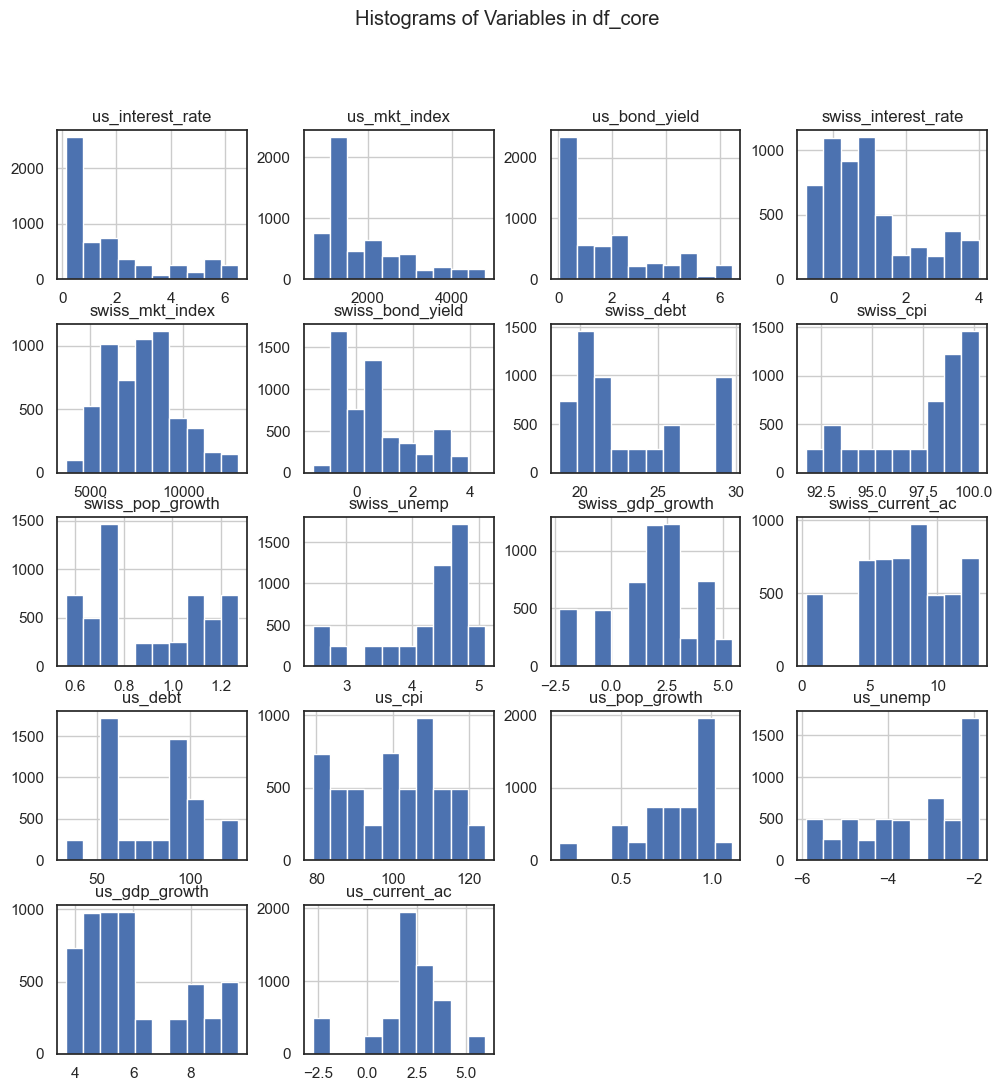

In [84]:
import matplotlib.pyplot as plt

# Create histograms for each column in df_core
df_core.hist(figsize=(12, 12))
plt.suptitle('Histograms of Variables in df_core')
plt.show()


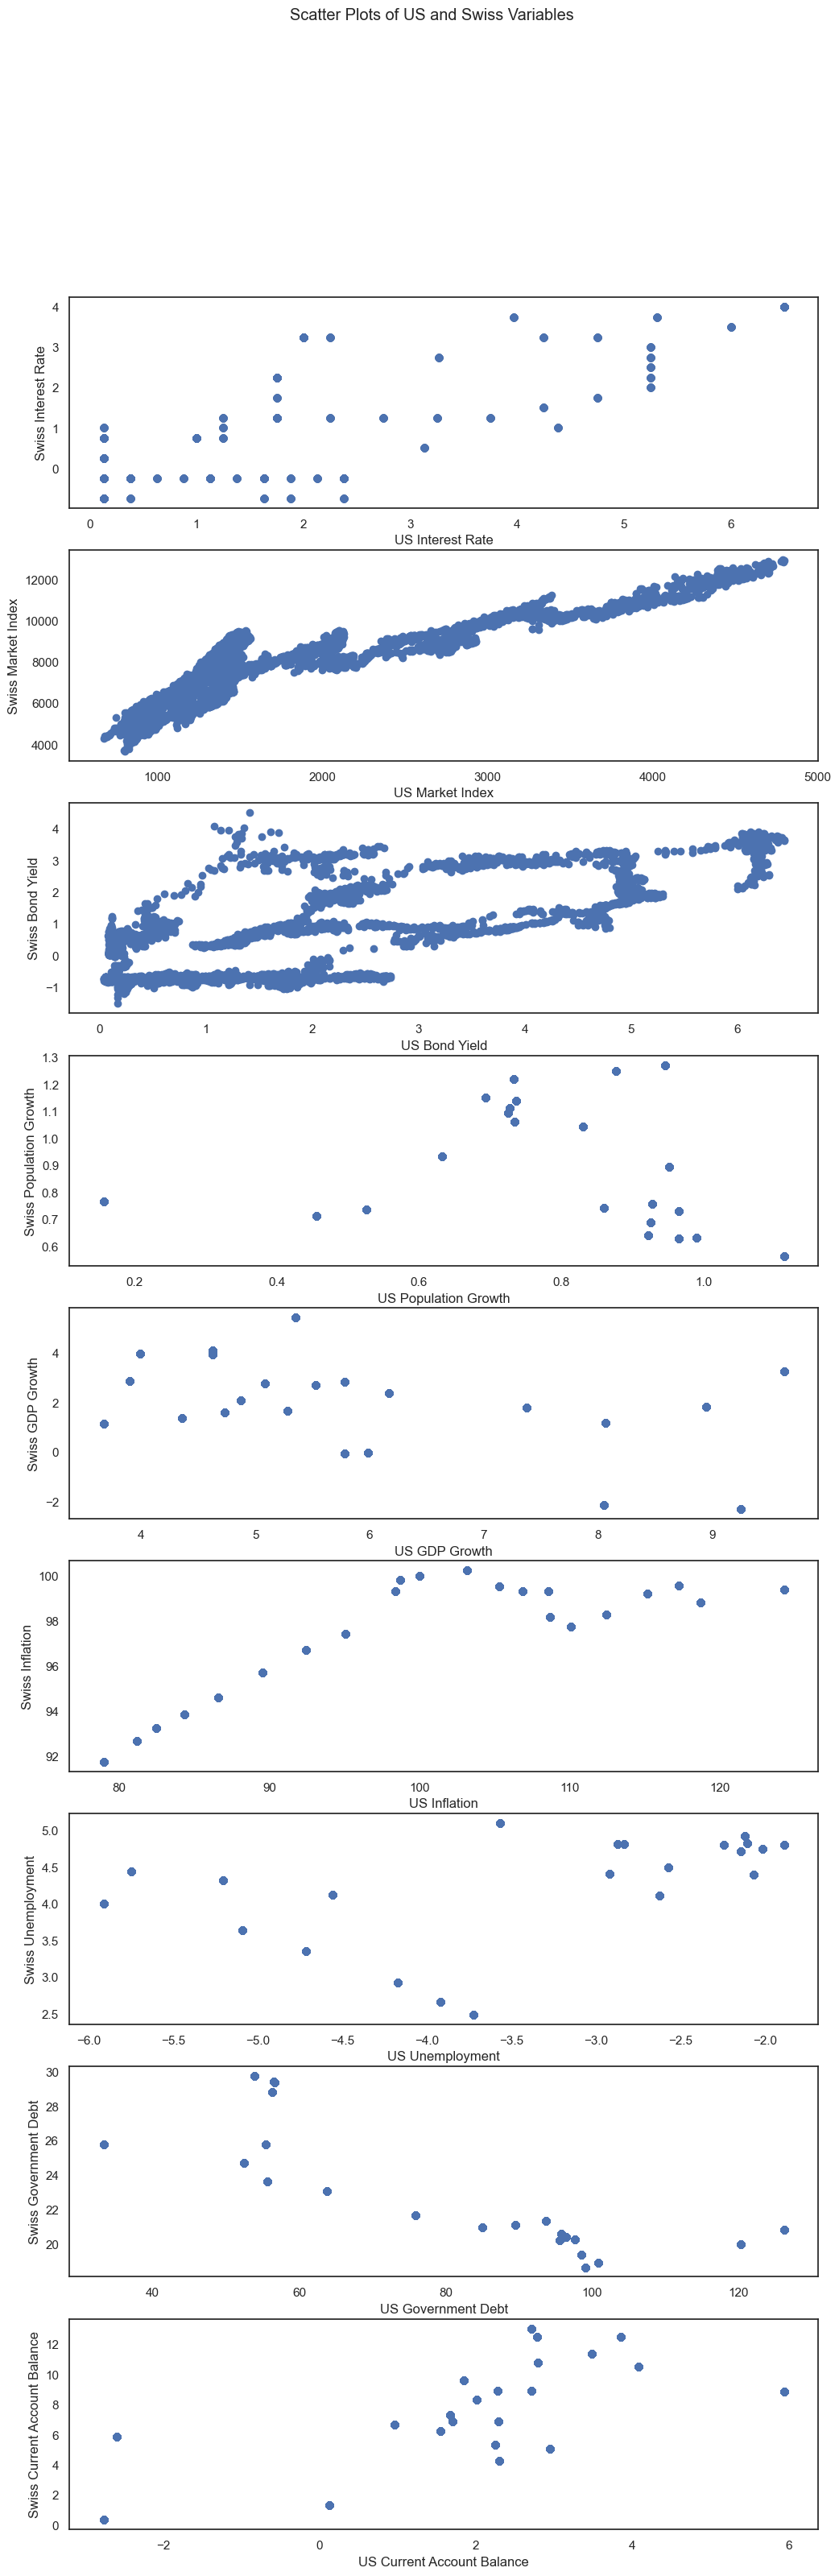

In [85]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(9, figsize=(12, 36))

# Scatter plot for interest rates
axs[0].scatter(df_core['us_interest_rate'], df_core['swiss_interest_rate'])
axs[0].set_xlabel('US Interest Rate')
axs[0].set_ylabel('Swiss Interest Rate')

# Scatter plot for market indexes
axs[1].scatter(df_core['us_mkt_index'], df_core['swiss_mkt_index'])
axs[1].set_xlabel('US Market Index')
axs[1].set_ylabel('Swiss Market Index')

# Scatter plot for bond yields
axs[2].scatter(df_core['us_bond_yield'], df_core['swiss_bond_yield'])
axs[2].set_xlabel('US Bond Yield')
axs[2].set_ylabel('Swiss Bond Yield')

# Scatter plot for population growth
axs[3].scatter(df_core['us_pop_growth'], df_core['swiss_pop_growth'])
axs[3].set_xlabel('US Population Growth')
axs[3].set_ylabel('Swiss Population Growth')

# Scatter plot for GDP growth
axs[4].scatter(df_core['us_gdp_growth'], df_core['swiss_gdp_growth'])
axs[4].set_xlabel('US GDP Growth')
axs[4].set_ylabel('Swiss GDP Growth')

# Scatter plot for inflation
axs[5].scatter(df_core['us_cpi'], df_core['swiss_cpi'])
axs[5].set_xlabel('US Inflation')
axs[5].set_ylabel('Swiss Inflation')

# Scatter plot for unemployment
axs[6].scatter(df_core['us_unemp'], df_core['swiss_unemp'])
axs[6].set_xlabel('US Unemployment')
axs[6].set_ylabel('Swiss Unemployment')

# Scatter plot for government debt
axs[7].scatter(df_core['us_debt'], df_core['swiss_debt'])
axs[7].set_xlabel('US Government Debt')
axs[7].set_ylabel('Swiss Government Debt')

# Scatter plot for current account balance
axs[8].scatter(df_core['us_current_ac'], df_core['swiss_current_ac'])
axs[8].set_xlabel('US Current Account Balance')
axs[8].set_ylabel('Swiss Current Account Balance')


plt.suptitle('Scatter Plots of US and Swiss Variables')
plt.show()

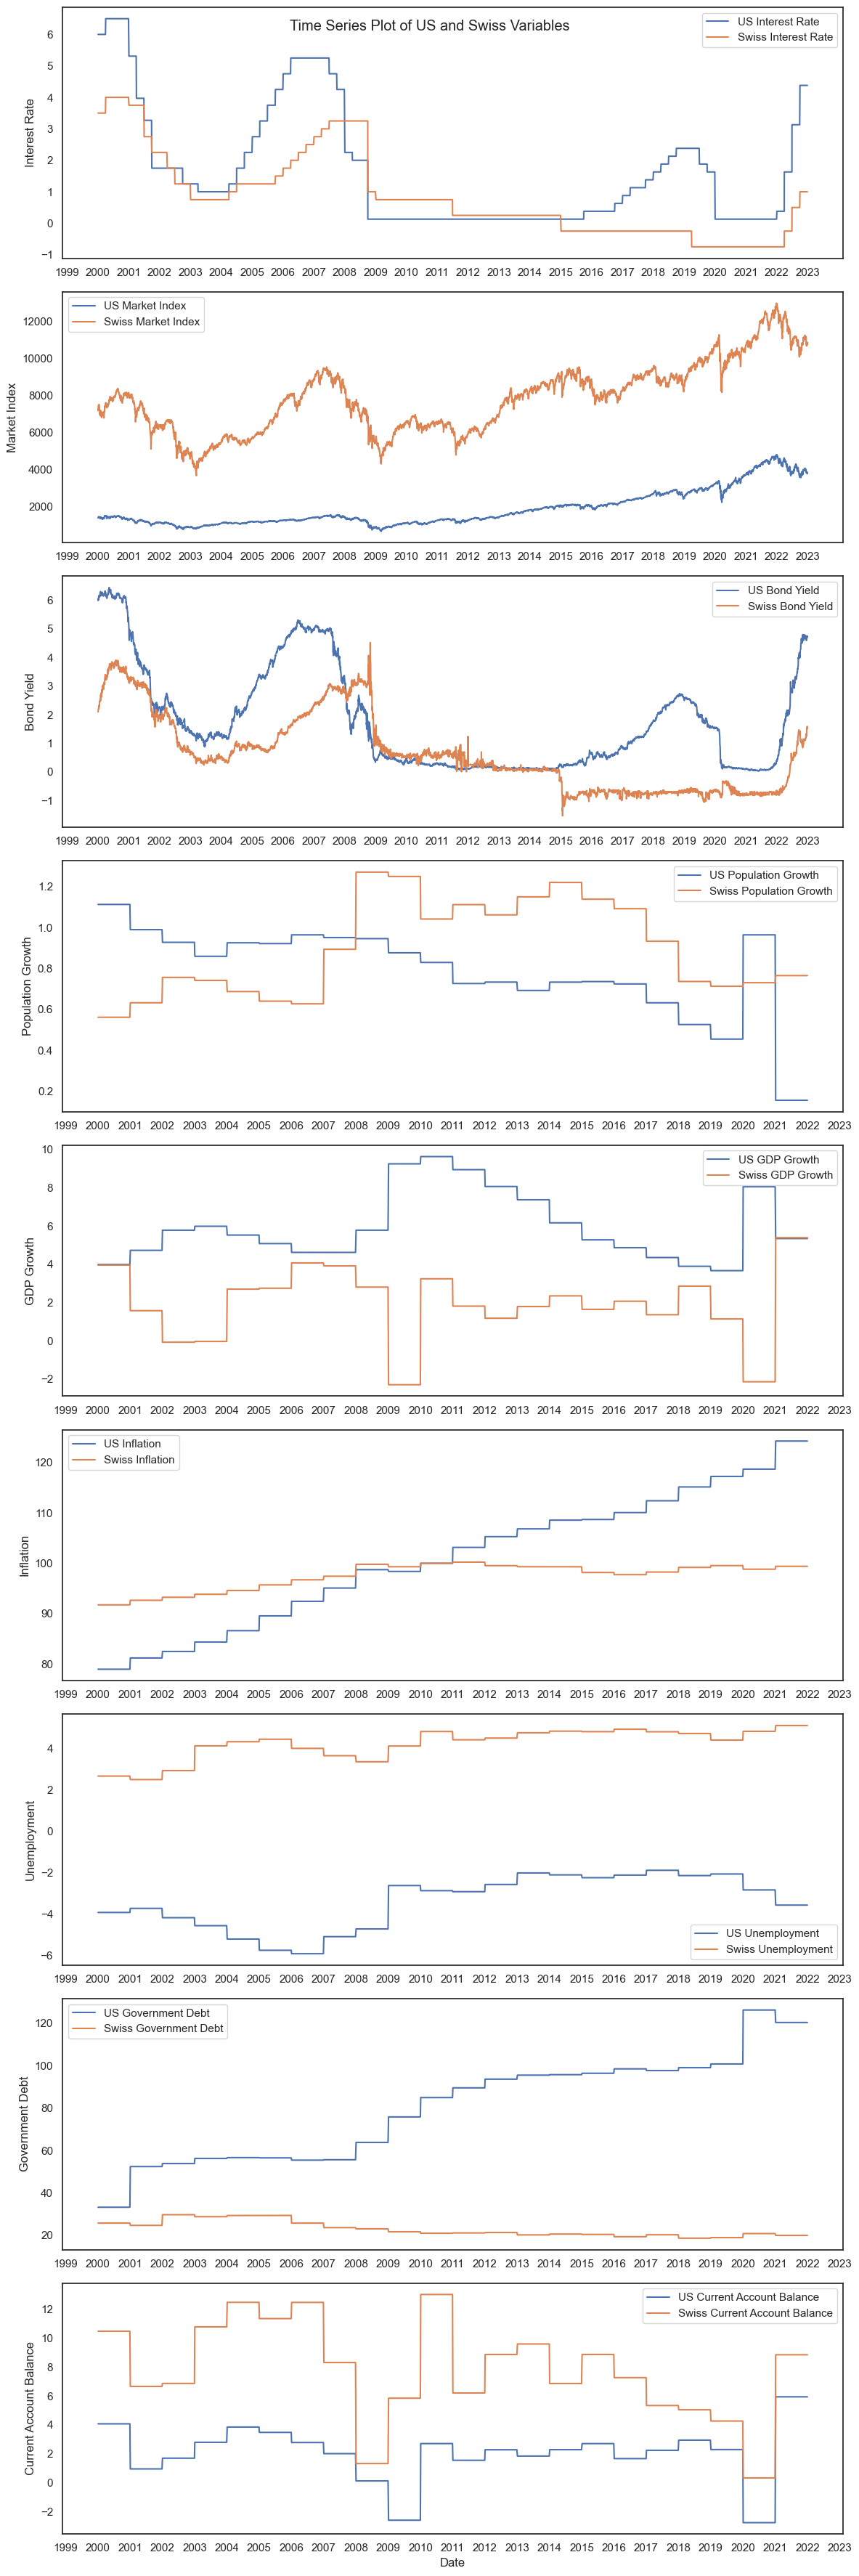

In [86]:
import matplotlib.dates as mdates

# Convert the index to datetime with dayfirst=True
df_core.index = pd.to_datetime(df_core.index, dayfirst=True)

fig, axs = plt.subplots(9, figsize=(12, 36))

# Time series plot for interest rates
axs[0].plot(df_core.index, df_core['us_interest_rate'], label='US Interest Rate')
axs[0].plot(df_core.index, df_core['swiss_interest_rate'], label='Swiss Interest Rate')
axs[0].set_ylabel('Interest Rate')
axs[0].legend()

# Time series plot for market indexes
axs[1].plot(df_core.index, df_core['us_mkt_index'], label='US Market Index')
axs[1].plot(df_core.index, df_core['swiss_mkt_index'], label='Swiss Market Index')
axs[1].set_ylabel('Market Index')
axs[1].legend()

# Time series plot for bond yields
axs[2].plot(df_core.index, df_core['us_bond_yield'], label='US Bond Yield')
axs[2].plot(df_core.index, df_core['swiss_bond_yield'], label='Swiss Bond Yield')
axs[2].set_ylabel('Bond Yield')
axs[2].legend()

# Time series plot for population growth
axs[3].plot(df_core.index, df_core['us_pop_growth'], label='US Population Growth')
axs[3].plot(df_core.index, df_core['swiss_pop_growth'], label='Swiss Population Growth')
axs[3].set_ylabel('Population Growth')
axs[3].legend()

# Time series plot for GDP growth
axs[4].plot(df_core.index, df_core['us_gdp_growth'], label='US GDP Growth')
axs[4].plot(df_core.index, df_core['swiss_gdp_growth'], label='Swiss GDP Growth')
axs[4].set_ylabel('GDP Growth')
axs[4].legend()

# Time series plot for inflation
axs[5].plot(df_core.index, df_core['us_cpi'], label='US Inflation')
axs[5].plot(df_core.index, df_core['swiss_cpi'], label='Swiss Inflation')
axs[5].set_ylabel('Inflation')
axs[5].legend()

# Time series plot for unemployment
axs[6].plot(df_core.index, df_core['us_unemp'], label='US Unemployment')
axs[6].plot(df_core.index, df_core['swiss_unemp'], label='Swiss Unemployment')
axs[6].set_ylabel('Unemployment')
axs[6].legend()

# Time series plot for government debt
axs[7].plot(df_core.index, df_core['us_debt'], label='US Government Debt')
axs[7].plot(df_core.index, df_core['swiss_debt'], label='Swiss Government Debt')
axs[7].set_ylabel('Government Debt')
axs[7].legend()

# Time series plot for current account balance
axs[8].plot(df_core.index, df_core['us_current_ac'], label='US Current Account Balance')
axs[8].plot(df_core.index, df_core['swiss_current_ac'], label='Swiss Current Account Balance')
axs[8].set_ylabel('Current Account Balance')
axs[8].set_xlabel('Date')
axs[8].legend()

# Format the x-axis to display less frequent ticks
years = mdates.YearLocator()   # every year
years_fmt = mdates.DateFormatter('%Y')

for ax in axs:
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)

plt.suptitle('Time Series Plot of US and Swiss Variables')
plt.tight_layout()
plt.show()

In [87]:
smi_matrix = pd.read_csv('smi_matrix.csv', index_col=0, parse_dates=True)
df_core = pd.read_csv('core.csv', index_col=0, parse_dates=True)

In [88]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Merge the data
df_swiss_eq = df_core.merge(smi_matrix, how='left', left_index=True, right_index=True).dropna()
df_swiss_eq.index = pd.to_datetime(df_swiss_eq.index, dayfirst=True)

# List of equities
equities = smi_matrix.columns

# df_swiss_eq = df_swiss_eq.drop(['swiss_mkt_index', 'us_mkt_index'], axis=1)

# Define the independent variables
X = df_swiss_eq[df_swiss_eq.columns.difference(equities)]
X = sm.add_constant(X)

# Run a separate regression model for each equity
for equity in equities:
    # Define the dependent variable
    y = df_swiss_eq[equity]

    # Ensure that the index is a DatetimeIndex
    # y.index = pd.to_datetime(y.index, dayfirst=True)

    # Run the regression model
    model = sm.OLS(y, X)
    results = model.fit()

    # # Plotting the OLS results
    # fig, axs = plt.subplots(figsize=(10, 6))
    # axs.plot(results.fittedvalues.index, results.fittedvalues, label='Fitted Values')
    # axs.plot(y.index, y, label='Actual Values')
    # axs.set_xlabel('Date')

    # # Format the x-axis to display less frequent ticks
    # years = mdates.YearLocator()   # every year
    # years_fmt = mdates.DateFormatter('%Y')
    # axs.xaxis.set_major_locator(years)
    # axs.xaxis.set_major_formatter(years_fmt)

    # axs.legend()
    # plt.ylabel('Value')
    # plt.title('OLS Results')
    # plt.show()

    # Print the results
    print(f'Results for {equity}:')
    print(results.summary())
    print('\n')

Results for NESN.SW:
                            OLS Regression Results                            
Dep. Variable:                NESN.SW   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     421.5
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          8.30e-237
Time:                        23:14:49   Log-Likelihood:                -1734.9
No. Observations:                 658   AIC:                             3486.
Df Residuals:                     650   BIC:                             3522.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
swiss_bond_yi

In [ ]:
# # Plotting the OLS results
# plt.figure(figsize=(10, 6))
# plt.plot(results.fittedvalues, label='Fitted Values')
# plt.plot(y, label='Actual Values')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.title('OLS Results')
# plt.legend()
# plt.show()


In [89]:
import numpy as np

# Calculate the correlation matrix between equities and indicators
correlation_matrix = X.corr()

# Calculate the average correlation for each indicator
average_correlation = correlation_matrix.mean()

# Sort the indicators based on average correlation
sorted_indicators = average_correlation.sort_values(ascending=False)

# Select the top five indicators
top_indicators = sorted_indicators[:5]

# Get the names of the top indicators
top_indicator_names = top_indicators.index.tolist()

# Print the top indicators
print("The five most reliable indicators for all 20 equities are:")
for indicator in top_indicator_names:
    print(indicator)


The five most reliable indicators for all 20 equities are:
us_cpi
swiss_pop_growth
us_mkt_index
swiss_mkt_index
swiss_unemp


In [90]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Merge the data
df_swiss_eq = df_core.merge(smi_matrix, how='left', left_index=True, right_index=True).dropna()
df_swiss_eq.index = pd.to_datetime(df_swiss_eq.index, dayfirst=True)

# List of equities
equities = smi_matrix.columns

df_swiss_eq = df_swiss_eq.drop(['swiss_mkt_index', 'us_mkt_index'], axis=1)

# Define the independent variables
X = df_swiss_eq[df_swiss_eq.columns.difference(equities)]
X = sm.add_constant(X)

# Run a separate regression model for each equity
for equity in equities:
    # Define the dependent variable
    y = df_swiss_eq[equity]

    # Ensure that the index is a DatetimeIndex
    # y.index = pd.to_datetime(y.index, dayfirst=True)

    # Run the regression model
    model = sm.OLS(y, X)
    results = model.fit()

    # # Plotting the OLS results
    # fig, axs = plt.subplots(figsize=(10, 6))
    # axs.plot(results.fittedvalues.index, results.fittedvalues, label='Fitted Values')
    # axs.plot(y.index, y, label='Actual Values')
    # axs.set_xlabel('Date')

    # # Format the x-axis to display less frequent ticks
    # years = mdates.YearLocator()   # every year
    # years_fmt = mdates.DateFormatter('%Y')
    # axs.xaxis.set_major_locator(years)
    # axs.xaxis.set_major_formatter(years_fmt)

    # axs.legend()
    # plt.ylabel('Value')
    # plt.title('OLS Results')
    # plt.show()

    # Print the results
    print(f'Results for {equity}:')
    print(results.summary())
    print('\n')

Results for NESN.SW:
                            OLS Regression Results                            
Dep. Variable:                NESN.SW   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     112.9
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           7.25e-86
Time:                        23:15:01   Log-Likelihood:                -2093.0
No. Observations:                 658   AIC:                             4198.
Df Residuals:                     652   BIC:                             4225.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
swiss_bond_yi

In [91]:
import numpy as np

# Calculate the correlation matrix between equities and indicators
correlation_matrix = X.corr()

# Calculate the average correlation for each indicator
average_correlation = correlation_matrix.mean()

# Sort the indicators based on average correlation
sorted_indicators = average_correlation.sort_values(ascending=False)

# Select the top five indicators
top_indicators = sorted_indicators[:5]

# Get the names of the top indicators
top_indicator_names = top_indicators.index.tolist()

# Print the top indicators
print("The five most reliable indicators for all 20 equities are:")
for indicator in top_indicator_names:
    print(indicator)


The five most reliable indicators for all 20 equities are:
us_cpi
swiss_pop_growth
swiss_unemp
swiss_gdp_growth
swiss_current_ac
